<a href="https://colab.research.google.com/github/nojoood/Assignment-/blob/main/The_Airbnb_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data description (Airbnb Dataset)**

>Airbnb is an American company that operates an online marketplace, primarily homestays for vacation rental and tourism activities.
The company is, which is based on San Francisco California, has a platform that is accessible via website and mobile applications.
Airbnb does not own any of the listed properties, instead, it profits by receiving commission from each booking.
Airbnb collected data about properties.
The data is sourced from publicly available information from the Airbnb site. The data has been aggregated where appropriate to facilitate public discussion. Since 2008, guests and hosts have used Airbnb to expand on 
traveling possibilities and present more unique, personalized way of experiencing the world. 
The dataset describes the listing activity and metrics in New York City (NYC).
For this assignment, we will use only listings Dataset. It is a detailed listing attributes that 
contains 16 Variables and 48,895 Observations (records) about different available
properties.


Since the data is raw, it may contain null values, missing values, etc. Accordingly, we need 
to preprocess it. 


**2. Looking to the Data and Preprocessing it:**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import warnings as war

In [ ]:
dt=pd.read_csv("AB_NYC_2019.csv")
dt

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
dt.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**1-Show, which attributes (variables), have missing values.**


In [ ]:

#dt.isna().any()
dt.isnull().sum()
#dt.isnull().any() 

#dt.isnull()  

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

 **2-Print out on the screen the total number of unique values of the categorical 
attributes: (minimum_nights, neighbourhood, room_type, price, number_of_reviews, 
availability_365)**

In [ ]:
#1
S=len(dt['minimum_nights'].unique())
A=len(dt['neighbourhood'].unique())
AA=len(dt['room_type'].unique())
Q=len(dt['price'].unique())
QQ=len(dt['number_of_reviews'].unique())
p=len(dt['availability_365'].unique())


print('minimum_nights ({}) neighbourhood ({}) room_type ({}) price ({}) number_of_reviews ({}) availability_365 ({})'.format(S,A,AA,Q,QQ,p))

minimum_nights (109) neighbourhood (221) room_type (3) price (674) number_of_reviews (394) availability_365 (366)


In [ ]:
#2
listofCols=["minimum_nights","neighbourhood", "room_type", "price", "number_of_reviews","availability_365"]
df1=dt[listofCols].nunique()
print(df1)       

minimum_nights       109
neighbourhood        221
room_type              3
price                674
number_of_reviews    394
availability_365     366
dtype: int64


**3- Print out unique values in neighbourhood_group with their frequencies**

In [ ]:
O=pd.value_counts(dt.neighbourhood_group)
print(O)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


**4- Plot the distribution of categorical attribute room type (In other words, visualize the 
categorical values for the room_type in a histogram by plotting the percentage of every 
room type)**

Text(0, 0.5, 'the percentage of every room_type')

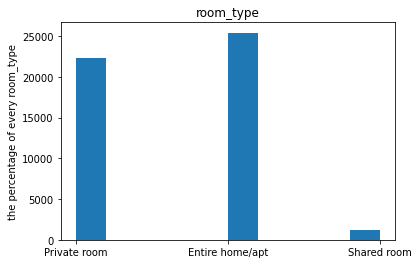

In [ ]:
fig = plt.figure(figsize=(6,4))
dt['room_type'].hist()
plt.title('room_type')
plt.grid(False, which='both')
plt.ylabel("the percentage of every room_type")



**5- Plot in a Pie Chart the distribution of neighbourhood_group using availability_365
attribute (with y='availability_365').**

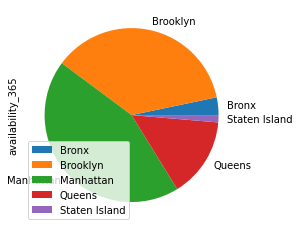

In [ ]:
dt.groupby(["neighbourhood_group"]).sum().plot(kind="pie",y="availability_365")

**6- Check whether price and number_of_reviews have outliers or not (Hint: plot Boxplot)**

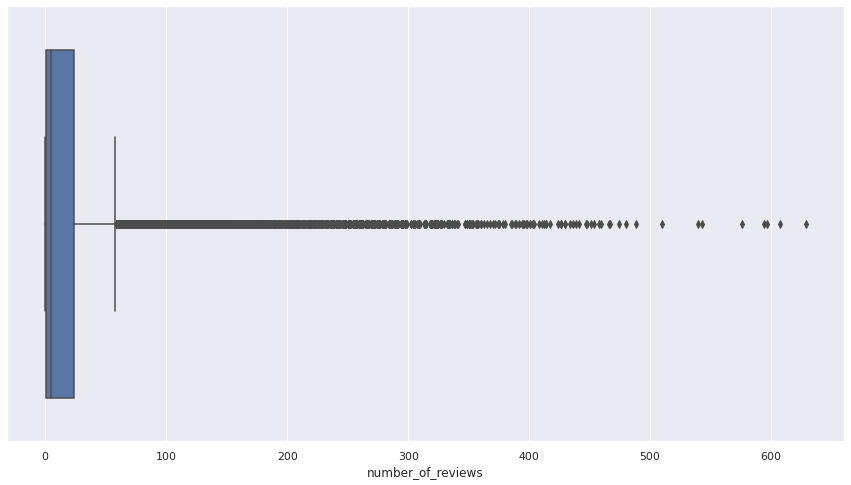

In [ ]:

price=dt["price"]
nor=dt["number_of_reviews"]
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x=nor, )
plt.show()


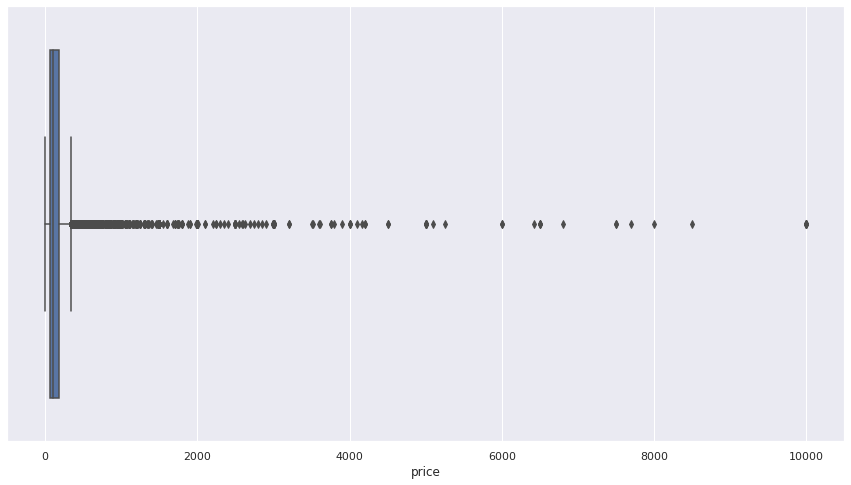

In [ ]:
sns.boxplot(x=price,)

**7- Plot the distribution of the categorical attribute room type vs 
calculated_host_listings_count (In other words, visualize the categorical values for the 
room_type in a histogram, whose Y – Axis is the calculated_host_listings_count).**

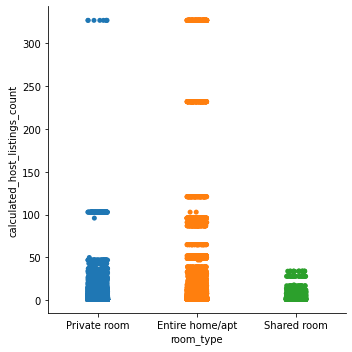

In [ ]:
sns.catplot(data=dt,x="room_type",y='calculated_host_listings_count')

**8- Since (reviews_per_month) is continuous, the mean will be used to handle missed data 
in this attribute.**

In [ ]:
#1
dt['reviews_per_month'].transform(lambda x: x.fillna(x.mean()))

0        0.210000
1        0.380000
2        1.373221
3        4.640000
4        0.100000
           ...   
48890    1.373221
48891    1.373221
48892    1.373221
48893    1.373221
48894    1.373221
Name: reviews_per_month, Length: 48895, dtype: float64

In [ ]:
import numpy as np 
#2
dt["reviews_per_month"]=dt["reviews_per_month"].fillna(dt["reviews_per_month"].mean())
dt

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,1.373221,6,2


**9- After showing this in our code (filling null values of reviews_per_month by mean), we 
change our mind because we discover that the mean is not suitable (note we are 
talking about number of reviews per month). Therefore, we decided to fill the 
original null values by zero – instead of mean. Show this change in your code**

In [ ]:
dt['reviews_per_month'].transform(lambda x: x.fillna(0))

0        0.210000
1        0.380000
2        1.373221
3        4.640000
4        0.100000
           ...   
48890    1.373221
48891    1.373221
48892    1.373221
48893    1.373221
48894    1.373221
Name: reviews_per_month, Length: 48895, dtype: float64

**10- To handle missed data of both name and host_name, which are categorical, a new class 
called (global constant) will be used.**

In [ ]:
newclass = "global constant"
dt["name"]=dt["name"].replace(to_replace=np.nan,value =newclass)
dt["host_name"]=dt["host_name"].replace(to_replace=np.nan,value =newclass)
dt["name"].isnull().sum()



0

In [ ]:
dt["host_name"].isnull().sum()

0

**11- Check whether the category values of (room_type), is consistent. If they are 
inconsistent, unify categories.**

In [ ]:
#1
dt['room_type'].value_counts()
#2
dt['room_type'].str.lower()  

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

**12- Since the (room_type) variable has only 3 levels ("Entire home/apt", "Private room", 
"Shared room"), you decided to convert the variable values into a numeric discrete
attribute with the value 0 for "Entire home/apt", the value 1 for "Private room" and 
the value 2 for "Shared room".**

In [ ]:
dt.replace({"Entire home/apt":0,"Private room":1, "Shared room":2})


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,1,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,0,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,1,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,0,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,0,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,1,70,2,0,NaN,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,1,40,4,0,NaN,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,0,115,10,0,NaN,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,2,55,1,0,NaN,1.373221,6,2


**13- Use Z-score to standardize/normalize price. Show your data after adding the Price Z 
score. Print out price with its Z-Score values (just print a sample not all values).**

In [ ]:
DX=dt['price']
stats.zscore(DX)


array([-0.01549307,  0.30097355, -0.01132904, ..., -0.15707024,
       -0.4069123 , -0.2611711 ])

**14-You decided to drop last_review variable because we are not going to use it.**

In [ ]:
#1
dt.drop(["last_review"], axis=1)
#2
dt.drop(columns=["last_review"])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,1.373221,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,1.373221,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1.373221,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1.373221,6,2


**15- Print out Correlation matrix in terms of heatmap between all variables.**

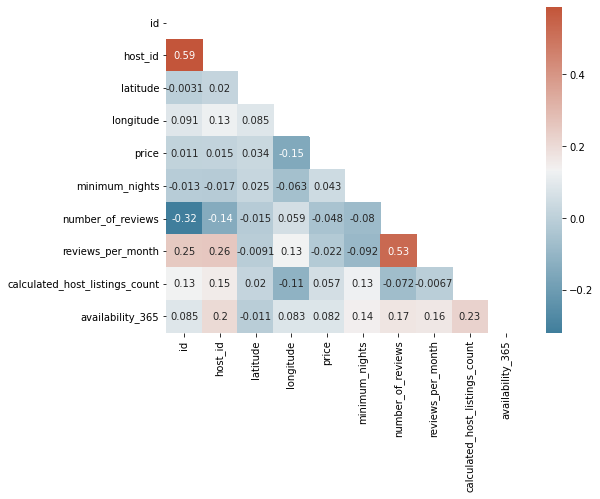

In [ ]:

corr = dt.corr()
X= plt.subplots(figsize=(8,6))
mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230,20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

**16-  Using the computed Z-score values for the price, write a code to guarantee that 
outliers in z-scores will be removed. 
Hint: to remove outlier, remove the Z-score values that are greater than 3 (on both 
sides)**

In [ ]:
to_remove=0
for i in DX:
    if (i> 3) or (i< -3) :
        to_remove+=1
to_remove

48884

**17- Determine the price range in both Manhattan and Bronx (neighbourhood attribute). To 
Hint: do this, you have to plot price Distribution in every neighbourhood_group based 
on the neighbourhood (s) (in other words, plot neighbourhood (s) and price for each 
neighbourhood_group)**

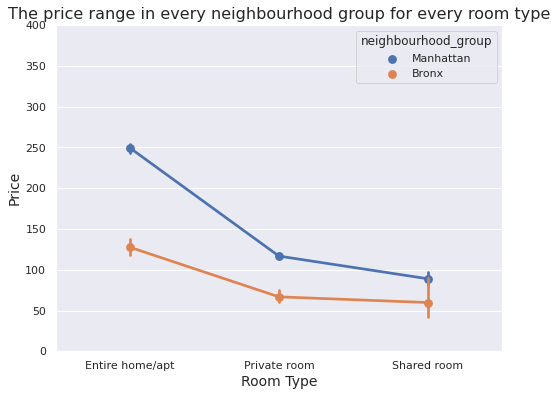

In [ ]:
plt.figure(figsize = [8,6])
data1=dt.loc[dt["neighbourhood_group"]=="Manhattan"]
data2=dt.loc[dt["neighbourhood_group"]=="Bronx"]
ax = sns.pointplot(data = pd.concat([data1,data2]), x = 'room_type', y = 'price', hue = 'neighbourhood_group')
plt.title('The price range in every neighbourhood group for every room type', fontsize = 16)
plt.xlabel('Room Type',fontsize = 14)
plt.ylabel('Price', fontsize = 14)
ax.set_ylim(0,400)
ax.set_yticks(range(0,450, 50))
plt.show();

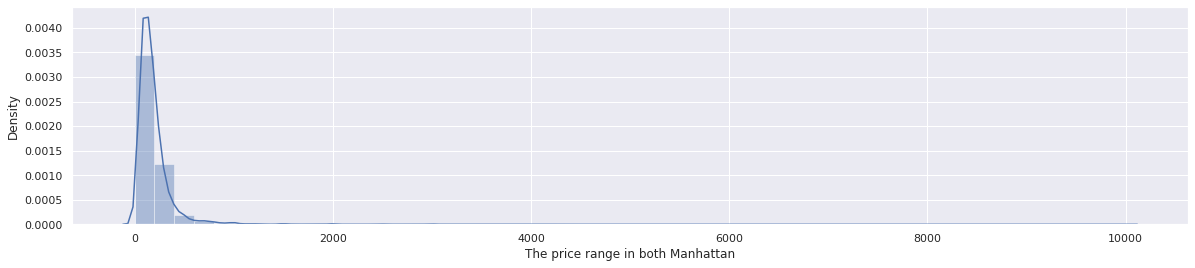

In [ ]:
war.filterwarnings('ignore')

manhattan = dt[(dt.neighbourhood_group == 'Manhattan')]
Broxn = dt[(dt.neighbourhood_group == 'Bronx')]



plt.subplots(figsize=(20,4))
sns.distplot(manhattan.price,hist=True,kde=True,axlabel='The price range in both Manhattan')

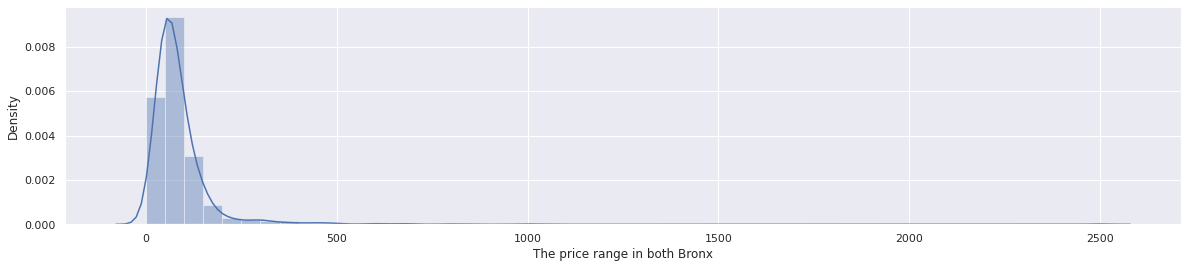

In [ ]:
plt.subplots(figsize=(20,4))
sns.distplot(Broxn.price,hist=True,kde=True,axlabel='The price range in both Bronx')

#Linear Regression of datd



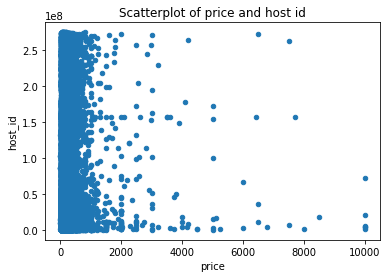

In [ ]:

dt.plot.scatter(x='price', y='host_id', title='Scatterplot of price and host id')

In [ ]:
dt.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
from sklearn.model_selection import train_test_split

y = dt['price'].values.reshape(-1, 1)
X = dt['number_of_reviews'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

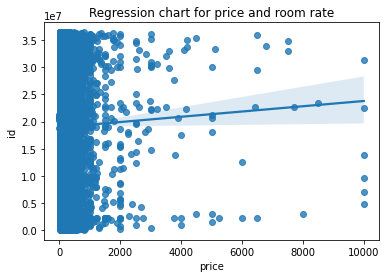

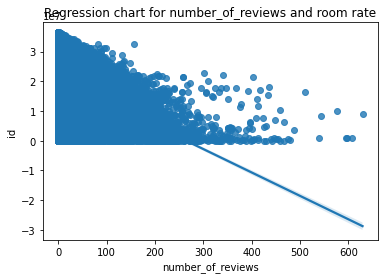

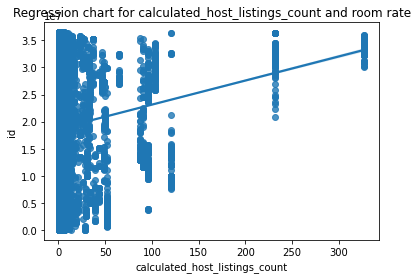

In [ ]:
import seaborn as sns 

variables = ['price','number_of_reviews','calculated_host_listings_count']

for var in variables:
    plt.figure() 
    sns.regplot(x=var, y='id', data=dt).set(title=f'Regression chart for {var} and room rate')

In [ ]:
y = dt['price']
X = dt[['id',"host_id","latitude","longitude","price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=SEED)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:

print(regressor.intercept_)

-1.038500840877532e-09


In [ ]:
regressor.coef_

array([ 7.69733312e-17, -6.55064841e-18,  3.88605586e-13, -1.00529817e-14,
        1.00000000e+00,  5.64685927e-16, -6.84427599e-16,  4.54416526e-16,
        5.90388096e-16, -1.27851350e-16])

In [ ]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df) 

                                Coefficient value
id                                   7.697333e-17
host_id                             -6.550648e-18
latitude                             3.886056e-13
longitude                           -1.005298e-14
price                                1.000000e+00
minimum_nights                       5.646859e-16
number_of_reviews                   -6.844276e-16
reviews_per_month                    4.544165e-16
calculated_host_listings_count       5.903881e-16
availability_365                    -1.278513e-16


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

       Actual  Predicted
879        89       89.0
44383      30       30.0
15394     120      120.0
43230     470      470.0
16332     199      199.0
...       ...        ...
20477     215      215.0
44969     100      100.0
36577      70       70.0
11477     500      500.0
1023      125      125.0

[9779 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)       
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.00
Mean squared error: 0.00
Root mean squared error: 0.00


In [ ]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 1.0


In [ ]:
regressor.score(X_test, y_test)

1.0

In [ ]:
regressor.score(X_train, y_train)

1.0